In [2]:
import os
os.getcwd()

'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining'

In [3]:
files=os.listdir("./data/writers")
files=sorted(files)
files

['ogai_gan.txt',
 'ogai_kanoyoni.txt',
 'ogai_niwatori.txt',
 'ogai_vita.txt',
 'soseki_eijitsu.txt',
 'soseki_garasu.txt',
 'soseki_omoidasu.txt',
 'soseki_yume.txt']

In [4]:
path=os.path.abspath("./data/writers")
files_path=[path + "/" + txt_name for txt_name in files]
files_path

['c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/ogai_gan.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/ogai_kanoyoni.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/ogai_niwatori.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/ogai_vita.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/soseki_eijitsu.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/soseki_garasu.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/soseki_omoidasu.txt',
 'c:\\Users\\katsu\\Desktop\\projects\\data_analystics\\python_de_textmining\\data\\writers/soseki_yume.txt']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(input='filename',ngram_range=(2,2),analyzer='char')
docs=cv.fit_transform(files_path)
docs

<8x26554 sparse matrix of type '<class 'numpy.int64'>'
	with 48176 stored elements in Compressed Sparse Row format>

In [6]:
bigrams=[(v,k) for k,v in (cv.vocabulary_).items() if k in ['が、','て、','と、','に、','は、','も、','ら、','で、']]
print(sorted(bigrams))

[(3223, 'が、'), (5718, 'て、'), (6244, 'で、'), (6605, 'と、'), (7448, 'に、'), (9336, 'は、'), (10632, 'も、'), (11223, 'ら、')]


In [7]:
bigrams_features=[i[1] for i in sorted(bigrams)]
bigrams_features

['が、', 'て、', 'で、', 'と、', 'に、', 'は、', 'も、', 'ら、']

In [8]:
bigrams_idx=[i[0] for i in sorted(bigrams)]
print(bigrams_idx)
docs.toarray()[:,bigrams_idx]
#docs.toarray()

[3223, 5718, 6244, 6605, 7448, 9336, 10632, 11223]


array([[ 66, 167,  67,  47,  55,  73,  10,  44],
       [ 66, 194,  52,  34,  81,  67,  25,  34],
       [ 48, 135,  76,  29,  36,  35,  14,  37],
       [ 63, 112,  53,  36,  47,  69,  21,  35],
       [ 31, 143,  37,  86,  41,  40,  22,  51],
       [ 28,  70,  36,  24,  41,  39,  10,  33],
       [ 38, 102,  46,  29,  32,  42,  18,  28],
       [ 33, 138,  38,  41,  39,  22,  13,  44]], dtype=int64)

In [9]:
import pandas as pd
bigrams_df=pd.DataFrame(docs.toarray()[:,bigrams_idx],columns=bigrams_features,index=files)
bigrams_df

,が、,て、,で、,と、,に、,は、,も、,ら、
ogai_gan.txt,66,167,67,47,55,73,10,44
ogai_kanoyoni.txt,66,194,52,34,81,67,25,34
ogai_niwatori.txt,48,135,76,29,36,35,14,37
ogai_vita.txt,63,112,53,36,47,69,21,35
soseki_eijitsu.txt,31,143,37,86,41,40,22,51
soseki_garasu.txt,28,70,36,24,41,39,10,33
soseki_omoidasu.txt,38,102,46,29,32,42,18,28
soseki_yume.txt,33,138,38,41,39,22,13,44


In [12]:
bigrams_df['が、']

ogai_gan.txt           66
ogai_kanoyoni.txt      66
ogai_niwatori.txt      48
ogai_vita.txt          63
soseki_eijitsu.txt     31
soseki_garasu.txt      28
soseki_omoidasu.txt    38
soseki_yume.txt        33
Name: が、, dtype: int64

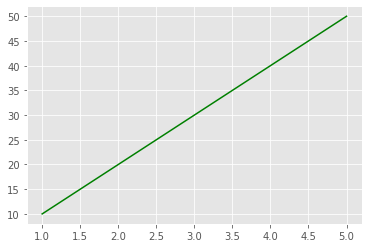

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x=[1,2,3,4,5]
y=[10,20,30,40,50]
fig=plt.figure()
ax=fig.subplots()
ax.plot(x,y,color='g')

<BarContainer object of 5 artists>

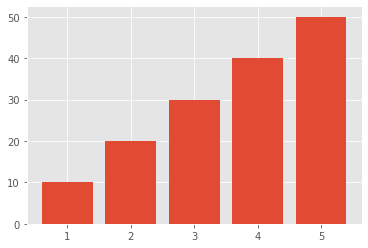

In [16]:
fig,ax=plt.subplots()
ax.bar(x,y)

Text(0.5, 1.0, 'Scatter Plot')

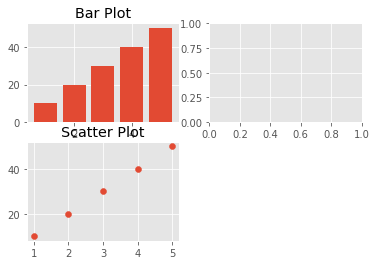

In [17]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax1.bar(x,y)
ax1.set_title('Bar Plot')
ax3.scatter(x,y)
ax3.set_title('Scatter Plot')

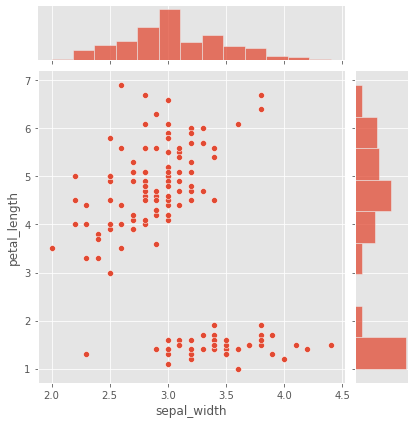

In [18]:
import seaborn as sns
iris=sns.load_dataset('iris')
sns.jointplot(x='sepal_width',y='petal_length',data=iris)

In [20]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========